# Regression with Deep Neural Network (DNN) using Julia Flux.

by Uki D. Lucas

September 11, 2020

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression-with-Deep-Neural-Network-(DNN)-using-Julia-Flux." data-toc-modified-id="Regression-with-Deep-Neural-Network-(DNN)-using-Julia-Flux.-1">Regression with Deep Neural Network (DNN) using Julia Flux.</a></span></li><li><span><a href="#Motivation" data-toc-modified-id="Motivation-2">Motivation</a></span></li><li><span><a href="#Declare-libraries-to-be-used" data-toc-modified-id="Declare-libraries-to-be-used-3">Declare libraries to be used</a></span></li><li><span><a href="#Set-Hyper-Parameters" data-toc-modified-id="Set-Hyper-Parameters-4">Set Hyper Parameters</a></span></li><li><span><a href="#DataSet" data-toc-modified-id="DataSet-5">DataSet</a></span><ul class="toc-item"><li><span><a href="#Explore-possible-RDatasets-data-sets" data-toc-modified-id="Explore-possible-RDatasets-data-sets-5.1">Explore possible RDatasets data sets</a></span></li><li><span><a href="#Fetch-Iris-DataFrame" data-toc-modified-id="Fetch-Iris-DataFrame-5.2">Fetch Iris DataFrame</a></span></li><li><span><a href="#Write-the-dataset-locally" data-toc-modified-id="Write-the-dataset-locally-5.3">Write the dataset locally</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-6">Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Print-column-numbers-and-names" data-toc-modified-id="Print-column-numbers-and-names-6.1">Print column numbers and names</a></span></li><li><span><a href="#Group-rows-by-Species-name" data-toc-modified-id="Group-rows-by-Species-name-6.2">Group rows by Species name</a></span></li><li><span><a href="#Filter-DataFrame-row-for-Specie-name" data-toc-modified-id="Filter-DataFrame-row-for-Specie-name-6.3">Filter DataFrame row for Specie name</a></span></li><li><span><a href="#Show-Types-of-the-columns" data-toc-modified-id="Show-Types-of-the-columns-6.4">Show Types of the columns</a></span></li></ul></li><li><span><a href="#One-hot-encoding-of-the-categories" data-toc-modified-id="One-hot-encoding-of-the-categories-7">One-hot encoding of the categories</a></span><ul class="toc-item"><li><span><a href="#Insert-one-hot-columns-into-DataFrame" data-toc-modified-id="Insert-one-hot-columns-into-DataFrame-7.1">Insert one-hot columns into DataFrame</a></span></li><li><span><a href="#Insert-one-hot-encodings-for-each-row" data-toc-modified-id="Insert-one-hot-encodings-for-each-row-7.2">Insert one-hot encodings for each row</a></span></li><li><span><a href="#Delete-the-:Species-column" data-toc-modified-id="Delete-the-:Species-column-7.3">Delete the :Species column</a></span></li><li><span><a href="#Save-the-dataset-to-the-disk" data-toc-modified-id="Save-the-dataset-to-the-disk-7.4">Save the dataset to the disk</a></span></li></ul></li><li><span><a href="#Normalize-the-independent-variable-data" data-toc-modified-id="Normalize-the-independent-variable-data-8">Normalize the independent variable data</a></span><ul class="toc-item"><li><span><a href="#Read-the-DataFrame-from-the-disk" data-toc-modified-id="Read-the-DataFrame-from-the-disk-8.1">Read the DataFrame from the disk</a></span></li><li><span><a href="#Save-Normalized-DataFrame" data-toc-modified-id="Save-Normalized-DataFrame-8.2">Save Normalized DataFrame</a></span></li></ul></li><li><span><a href="#Split-the-dataset-into-training-and-validation-sets" data-toc-modified-id="Split-the-dataset-into-training-and-validation-sets-9">Split the dataset into training and validation sets</a></span><ul class="toc-item"><li><span><a href="#Read-normalized-DataFrame" data-toc-modified-id="Read-normalized-DataFrame-9.1">Read normalized DataFrame</a></span></li><li><span><a href="#Training-Set,-Validation-set" data-toc-modified-id="Training-Set,-Validation-set-9.2">Training Set, Validation set</a></span></li><li><span><a href="#X_train,-y_train,-X_test,-y_test" data-toc-modified-id="X_train,-y_train,-X_test,-y_test-9.3">X_train, y_train, X_test, y_test</a></span></li></ul></li><li><span><a href="#DNN-Model" data-toc-modified-id="DNN-Model-10">DNN Model</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-11">Training</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-12">Testing</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-13">Resources</a></span></li></ul></div>

# Motivation

I have not found a clear example of how to perform a regression (prediction of a number) using Julia Deep Neural Network, in this case using Flux.

I am using Iris dataset because it is very well known, and hence trying to remove on step of difficulty.

# Declare libraries to be used

In [61]:
using Flux
using Flux: logitcrossentropy, normalise, onecold, onehotbatch
using Flux: @epochs
using Statistics: mean
using Parameters: @with_kw

# Set Hyper Parameters

You can run the cell below only once.

In [2]:
@with_kw mutable struct HyperParameters
    learning_rate::Float64 = 0.5
    epochs::Int = 110
    split_ratio::Float64 = 0.2
end

HyperParameters

# DataSet

## Explore possible RDatasets data sets

In [3]:
download( "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/datasets.csv" , 
    "RDatasets.csv" ) # URL, name to save
using CSV
df1 = CSV.read("RDatasets.csv")
println(size(df1))
df1[100:105,:]

(1303, 12)


,Package,Item,Title
,String,String,String
1,carData,States,Education and Related Statistics for the U.S. States
2,carData,TitanicSurvival,Survival of Passengers on the Titanic
3,carData,Transact,Transaction data
4,carData,UN,"National Statistics from the United Nations, Mostly From 2009-2011"
5,carData,UN98,United Nations Social Indicators Data 1998]
6,carData,USPop,Population of the United States


In [4]:
# Flux also offerrs datasets

In [5]:
#labels = Flux.Data.Iris.labels()
features = Flux.Data.Iris.features()
features'

150×4 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮              
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

DataFrame


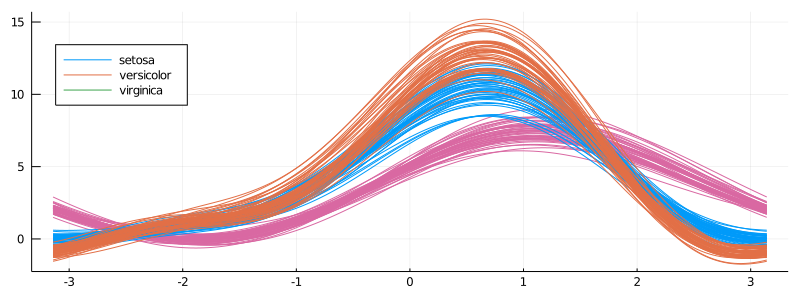

In [108]:
using RDatasets, DataFrames
using StatsPlots: @df
gr(size=(800,300))

iris = RDatasets.dataset("datasets", "iris")
println(typeof(iris))
@df iris StatsPlots.andrewsplot(:Species, cols(1:4), legend = :topleft)

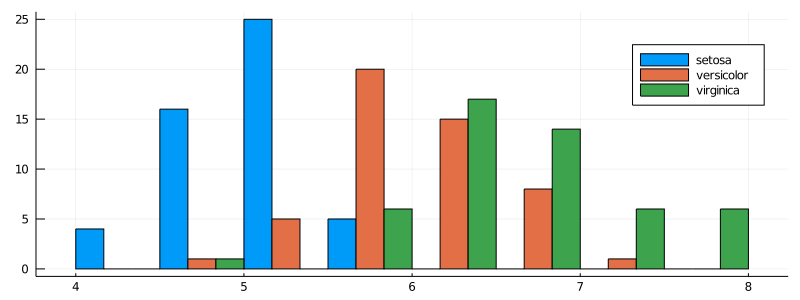

In [109]:
using RDatasets
iris = dataset("datasets", "iris")
@df iris groupedhist(:SepalLength, group = :Species, bar_position = :dodge)

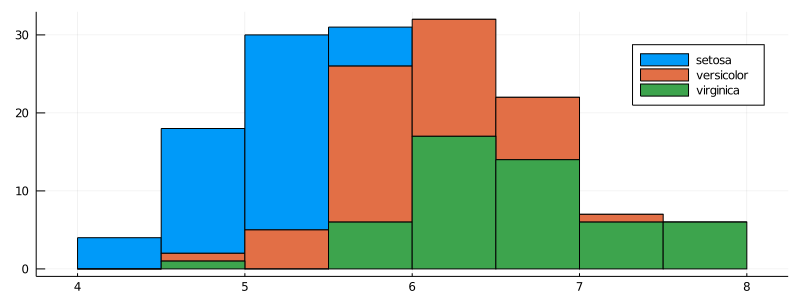

In [110]:
@df iris groupedhist(:SepalLength, group = :Species, bar_position = :stack)

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
┌ Warning: Attribute alias `ylabel` detected in the user recipe defined for the signature (::MDS{Float64}). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots /Users/uki/.julia/packages/Plots/8GUYs/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::MDS{Float64}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/uki/.julia/packages/Plots/8GUYs/src/pipeline.jl:15
┌ Warning: Attribute alias `ylabel` detected in the user recipe defined for the signature (::MDS{Float64}). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots /Users/uki/.julia/packages/Plots/8GUYs/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in 

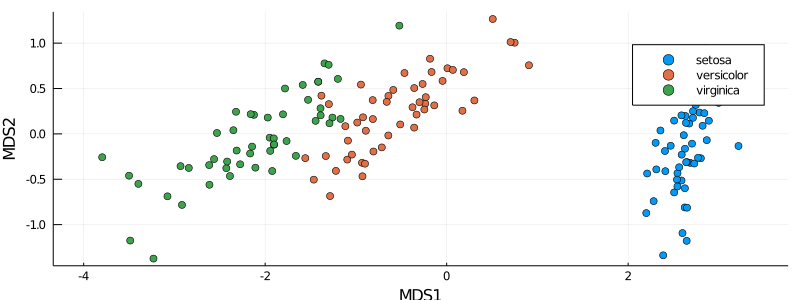

In [111]:
import Pkg; Pkg.add("MultivariateStats")
using MultivariateStats, RDatasets, StatsPlots

iris = dataset("datasets", "iris")
X = convert(Matrix, iris[:, 1:4])
M = fit(MDS, X'; maxoutdim=2)

plot(M, group=iris.Species)

## Fetch Iris DataFrame

In [6]:
using RDatasets: dataset
iris = dataset("datasets", "iris") # return DataFrames.DataFrame
iris[1:5, :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Write the dataset locally

In [7]:
CSV.write("iris.csv", iris, delim = ',')

"iris.csv"

# Exploratory Data Analysis (EDA)


## Print column numbers and names

In [8]:
for i in 1:length(names(iris))
    println(i, " ", names(iris)[i])
end

1 SepalLength
2 SepalWidth
3 PetalLength
4 PetalWidth
5 Species


## Group rows by Species name

In [9]:
using DataFrames
groups = groupby(iris, [:Species] ) # GroupedDataFrame{DataFrame}

#[ groups[1][1,5] groups[2][1,5] groups[3][1,5] ] # show row 1, column 5 from each group

labels = []
for i in 1:length(groups)
    label = groups[i][1,5]
    push!(labels, label ) # example CategoricalString{UInt8} "setosa"
    println( label )
end

labels

setosa
versicolor
virginica


3-element Array{Any,1}:
 CategoricalString{UInt8} "setosa"
 CategoricalString{UInt8} "versicolor"
 CategoricalString{UInt8} "virginica"

## Filter DataFrame row for Specie name

In [10]:
filter_virginica = iris[!, :Species] .== "virginica" # for each row determin if Species is virginica
filter_virginica[end-3:end]

4-element BitArray{1}:
 1
 1
 1
 1

In [11]:
x = iris[filter_virginica, 5:8]
x[1:3, :]

BoundsError: BoundsError: attempt to access String

## Show Types of the columns

In [12]:
eltype.(eachcol(iris))

5-element Array{DataType,1}:
 Float64
 Float64
 Float64
 Float64
 CategoricalString{UInt8}

# One-hot encoding of the categories

- https://fluxml.ai/Flux.jl/stable/data/onehot/

## Insert one-hot columns into DataFrame

In [13]:
insertcols!(iris                     # DataFrame to be changed
        , 6                          # insert as column number,
        , makeunique=true            # if the name of the column exist, make is name_1
        , setosa=0.0                 # name of the colum and values, make sure type is right
        )  
insertcols!(iris                      
        , 7                               
        , makeunique=true                
        , versicolor=0.0                    
        )  
insertcols!(iris                    
        , 8                              
        , makeunique=true               
        , virginica=0.0              
        )  
iris[1:3, 5:end]

,Species,setosa,versicolor,virginica
,Categorical…,Float64,Float64,Float64
1,setosa,0.0,0.0,0.0
2,setosa,0.0,0.0,0.0
3,setosa,0.0,0.0,0.0


## Insert one-hot encodings for each row

There is a **Flux.onehot** method, but it is so cryptic that I prefered to write my own code.

In [14]:
using DataFrames
column_species     = 5                              # column number with lables
column_setosa      = 6
column_versicolor  = 7
column_virginica   = 8

number_of_rows = size(iris)[1]                      # rows, columns

for i in 1:number_of_rows                           # go thru all rows
    specie = string( iris[i, column_species] )      # CategoricalString{UInt8} to String
    
    if specie == "setosa" 
        iris[i, column_setosa] = 1.0
    elseif specie == "versicolor" 
        iris[i, column_versicolor] = 1.0
    elseif specie == "virginica" 
        iris[i, column_virginica] = 1.0
    else
        println( specie, " not found!" )
    end
end

iris[48:53, 5:end]                                  # a quick sanity check

,Species,setosa,versicolor,virginica
,Categorical…,Float64,Float64,Float64
1,setosa,1.0,0.0,0.0
2,setosa,1.0,0.0,0.0
3,setosa,1.0,0.0,0.0
4,versicolor,0.0,1.0,0.0
5,versicolor,0.0,1.0,0.0
6,versicolor,0.0,1.0,0.0


## Delete the :Species column

In [15]:
select!(iris, Not(:Species))
names(iris)

7-element Array{Symbol,1}:
 :SepalLength
 :SepalWidth
 :PetalLength
 :PetalWidth
 :setosa
 :versicolor
 :virginica

## Save the dataset to the disk

In [16]:
CSV.write("iris.csv", iris, delim = ',')

"iris.csv"

# Normalize the independent variable data

Since I am doing regression, I will be guessing column 1 SepalLength.

All other columns I will normalize.

- https://docs.julialang.org/en/v1/stdlib/Statistics/

## Read the DataFrame from the disk

In [17]:
iris = CSV.read("iris.csv", copycols=true)
println(size(iris))
iris[100:105,1:end]

(150, 7)


,SepalLength,SepalWidth,PetalLength,PetalWidth,setosa,versicolor,virginica
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,5.7,2.8,4.1,1.3,0.0,1.0,0.0
2,6.3,3.3,6.0,2.5,0.0,0.0,1.0
3,5.8,2.7,5.1,1.9,0.0,0.0,1.0
4,7.1,3.0,5.9,2.1,0.0,0.0,1.0
5,6.3,2.9,5.6,1.8,0.0,0.0,1.0
6,6.5,3.0,5.8,2.2,0.0,0.0,1.0


In [18]:
columns = [2, 3, 4, 5, 6, 7]

6-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7

In [19]:
using Statistics
using DataFrames

function normalize!(df::DataFrame, columns::Array{Int64,1})
    rows::Int64 = size(df)[1] # rows, columns
    
    for column in columns
        column_mean = mean(df[!,column])
        column_std = std(df[!,column])
        
        for row in 1:rows
            df[row, column] = ( df[row, column] - column_mean ) / column_std
        end
    end
end

normalize!(iris, columns)
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,setosa,versicolor,virginica
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,5.1,1.0156,-1.33575,-1.31105,1.40949,-0.704746,-0.704746
2,4.9,-0.131539,-1.33575,-1.31105,1.40949,-0.704746,-0.704746
3,4.7,0.327318,-1.3924,-1.31105,1.40949,-0.704746,-0.704746
4,4.6,0.0978893,-1.2791,-1.31105,1.40949,-0.704746,-0.704746
5,5.0,1.24503,-1.33575,-1.31105,1.40949,-0.704746,-0.704746
6,5.4,1.93331,-1.16581,-1.04867,1.40949,-0.704746,-0.704746
7,4.6,0.786174,-1.33575,-1.17986,1.40949,-0.704746,-0.704746
8,5.0,0.786174,-1.2791,-1.31105,1.40949,-0.704746,-0.704746
9,4.4,-0.360967,-1.33575,-1.31105,1.40949,-0.704746,-0.704746


## Save Normalized DataFrame

In [22]:
CSV.write("iris_normalized.csv", iris, delim = ',')

"iris_normalized.csv"

# Split the dataset into training and validation sets

## Read normalized DataFrame

In [24]:
iris = CSV.read("iris_normalized.csv", copycols=true)
println(size(iris))
iris[98:103,1:end]

(150, 7)


,SepalLength,SepalWidth,PetalLength,PetalWidth,setosa,versicolor,virginica
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,6.2,-0.360967,0.30703,0.132067,-0.704746,1.40949,-0.704746
2,5.1,-1.27868,-0.429389,-0.130318,-0.704746,1.40949,-0.704746
3,5.7,-0.590395,0.193735,0.132067,-0.704746,1.40949,-0.704746
4,6.3,0.556746,1.27004,1.70638,-0.704746,-0.704746,1.40949
5,5.8,-0.819823,0.760211,0.919223,-0.704746,-0.704746,1.40949
6,7.1,-0.131539,1.21339,1.18161,-0.704746,-0.704746,1.40949


## Training Set, Validation set

In [28]:
using Random

function split_dataset(df, split_ratio)
    records = size(df, 1)
    validation_rows = Random.randsubseq(1:records, split_ratio)
    training_rows = [i for i in 1:records if isempty(searchsorted(validation_rows, i))]
    return (df[training_rows, :], df[validation_rows, :]) # training, validation sets
end

params = HyperParameters()
training_set, testing_set = split_dataset(iris, params.split_ratio)

(116×7 DataFrame. Omitted printing of 2 columns
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ setosa    │
│     │ Float64     │ Float64    │ Float64     │ Float64    │ Float64   │
├─────┼─────────────┼────────────┼─────────────┼────────────┼───────────┤
│ 1   │ 5.1         │ 1.0156     │ -1.33575    │ -1.31105   │ 1.40949   │
│ 2   │ 4.9         │ -0.131539  │ -1.33575    │ -1.31105   │ 1.40949   │
│ 3   │ 4.6         │ 0.0978893  │ -1.2791     │ -1.31105   │ 1.40949   │
│ 4   │ 5.0         │ 1.24503    │ -1.33575    │ -1.31105   │ 1.40949   │
│ 5   │ 4.6         │ 0.786174   │ -1.33575    │ -1.17986   │ 1.40949   │
│ 6   │ 5.0         │ 0.786174   │ -1.2791     │ -1.31105   │ 1.40949   │
│ 7   │ 4.4         │ -0.360967  │ -1.33575    │ -1.31105   │ 1.40949   │
│ 8   │ 4.8         │ 0.786174   │ -1.22246    │ -1.31105   │ 1.40949   │
│ 9   │ 4.8         │ -0.131539  │ -1.33575    │ -1.44224   │ 1.40949   │
│ 10  │ 4.3         │ -0.131539  │ -1.50569    │ -1.44224   │ 1.

## X_train, y_train, X_test, y_test

- X_train: normalized features
- y_train: not normalized result
- X_test: normalized features
- y_test: not normalized result

In [30]:
X_train = training_set[:, 2:end]
y_train = training_set[:, 1]

X_test = testing_set[:, 2:end]
y_test = testing_set[:, 1]

size(X_train)

(116, 6)

# DNN Model


- $ \sigma $ is a sigmoid activation function
- https://fluxml.ai/Flux.jl/stable/models/layers/

In [85]:
using Flux # UndefVarError: 𝜎 not defined

number_of_inputs = size(X_train)[2]
println("number_of_inputs: ", number_of_inputs) 

model = Chain(
    Dense(number_of_inputs, 12 ),
    Dense(12, 1 , softmax)       # output layer, single resulting number
    )

number_of_inputs: 6


Chain(Dense(6, 12), Dense(12, 1, softmax))

# Training

In [37]:
args = HyperParameters()

HyperParameters
  learning_rate: Float64 0.5
  epochs: Int64 110
  split_ratio: Float64 0.2


In [79]:
using Flux
using Flux: @epochs

modelReg = Chain(Dense(1, 1), identity)
loss(x, y) = Flux.mse(modelReg(x), y)
opt = SGD(Flux.params(modelReg), 0.1)
@epochs 100 Flux.train!(loss, regData, opt)

In [84]:
x = X_train # Y ???
y = y_train # ŷ ???
data = [(x, y)]

#train_data, test_data = get_processed_data(args)

#loss(x, y) = logitcrossentropy(model(x), y)
# agg((ŷ .- y).^2)
# mse(model(x), y)

function mse()
loss(x, y) = Flux.Losses.agg((y .- x).^2)

parameters = Flux.params(model)

optimiser = Descent(args.learning_rate)

println("Starting training.")

eval_callback() = @show(loss(test_x, test_y))

@epochs 3 Flux.Optimise.train!(loss, parameters, data, optimiser ) #, 
    #callback = throttle(eval_callback, 1) 
    #callback = throttle(() -> print("."), 1) 
)
println("Ended training.")

#cd(@__DIR__)
#model = train()

Starting training.


┌ Info: Epoch 1
└ @ Main /Users/uki/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105


UndefVarError: UndefVarError: Losses not defined

# Testing

In [ ]:

function test(model, test)
    # Testing model performance on test data 
    X_test, y_test = test
    accuracy_score = accuracy(X_test, y_test, model)

    println("\nAccuracy: $accuracy_score")

    # Sanity check.
    @assert accuracy_score > 0.8

    # To avoid confusion, here is the definition of a Confusion Matrix: https://en.wikipedia.org/wiki/Confusion_matrix
    println("\nConfusion Matrix:\n")
    display(confusion_matrix(X_test, y_test, model))
end


test(model, test_data)

# Resources
- https://medium.com/gft-engineering/start-to-learn-machine-learning-with-the-iris-flower-classification-challenge-4859a920e5e3
- https://medium.com/@Nivitus./iris-flower-classification-machine-learning-d4e337140fa4